In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.simplefilter("ignore")

RANDOM_STATE_SEED = 12

# Reading the dataset And display the data

In [25]:
df_dataset = pd.read_csv("02-14-2018.csv")
df_dataset

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [26]:
df_dataset.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,6.255555e+06,6.206622e+00,7.211191e+00,4.479936e+02,4.521803e+03,1.745736e+02,8.389535e+00,3.879579e+01,...,2.793536e+00,2.327970e+01,5.152449e+04,2.136151e+04,8.789157e+04,3.995477e+04,3.101206e+06,7.297218e+05,4.812391e+06,2.126920e+06
std,1.444344e+04,4.460625e+00,1.260291e+09,4.447851e+01,1.048682e+02,1.573541e+04,1.515021e+05,2.876713e+02,1.948279e+01,5.331882e+01,...,5.557106e+00,1.106185e+01,5.815586e+05,2.186405e+05,7.395725e+05,5.602693e+05,5.414780e+08,3.820031e+08,1.522117e+09,1.817013e+07
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.300000e+01,6.000000e+00,1.023000e+03,2.000000e+00,1.000000e+00,3.600000e+01,5.500000e+01,3.400000e+01,0.000000e+00,2.566667e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,6.000000e+00,4.066690e+05,7.000000e+00,6.000000e+00,4.550000e+02,7.680000e+02,1.990000e+02,0.000000e+00,5.550000e+01,...,4.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553300e+04,1.700000e+01,1.200000e+08,5.115000e+03,9.198000e+03,8.591554e+06,1.339773e+07,6.444000e+04,1.460000e+03,1.121703e+04,...,1.031000e+03,4.800000e+01,1.102401e+08,5.723446e+07,1.102401e+08,1.102401e+08,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10


In [27]:
# feature information
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

# Taking care of missing data, infinity

In [28]:
# replace +ve and -ve infinity with NaN
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dataset.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,6.255555e+06,6.206622e+00,7.211191e+00,4.479936e+02,4.521803e+03,1.745736e+02,8.389535e+00,3.879579e+01,...,2.793536e+00,2.327970e+01,5.152449e+04,2.136151e+04,8.789157e+04,3.995477e+04,3.101206e+06,7.297218e+05,4.812391e+06,2.126920e+06
std,1.444344e+04,4.460625e+00,1.260291e+09,4.447851e+01,1.048682e+02,1.573541e+04,1.515021e+05,2.876713e+02,1.948279e+01,5.331882e+01,...,5.557106e+00,1.106185e+01,5.815586e+05,2.186405e+05,7.395725e+05,5.602693e+05,5.414780e+08,3.820031e+08,1.522117e+09,1.817013e+07
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.300000e+01,6.000000e+00,1.023000e+03,2.000000e+00,1.000000e+00,3.600000e+01,5.500000e+01,3.400000e+01,0.000000e+00,2.566667e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,6.000000e+00,4.066690e+05,7.000000e+00,6.000000e+00,4.550000e+02,7.680000e+02,1.990000e+02,0.000000e+00,5.550000e+01,...,4.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553300e+04,1.700000e+01,1.200000e+08,5.115000e+03,9.198000e+03,8.591554e+06,1.339773e+07,6.444000e+04,1.460000e+03,1.121703e+04,...,1.031000e+03,4.800000e+01,1.102401e+08,5.723446e+07,1.102401e+08,1.102401e+08,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10


In [29]:
# drop missing values
df_dataset.dropna(inplace=True)
df_dataset

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


# Classifying labels as Benign, Malicious

In [30]:
df_dataset["Label"].value_counts()

Label
Benign            663808
FTP-BruteForce    193354
SSH-Bruteforce    187589
Name: count, dtype: int64

# Removing duplicate rows

In [31]:
df_dataset.duplicated().sum()

225625

In [32]:
df_dataset.drop_duplicates(inplace = True)

In [33]:
df_dataset.duplicated().sum()

0

In [34]:
df_dataset["Label"].value_counts()

Label
Benign            662458
SSH-Bruteforce    117322
FTP-BruteForce     39346
Name: count, dtype: int64

In [35]:
df = df_dataset

In [36]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='FTP-BruteForce', 
           y=df["Label"].value_counts().values[1:2],
           x=['FTP-BruteForce'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='SSH-Bruteforce', 
           y=df["Label"].value_counts().values[2:],
           x=['SSH-Bruteforce'],
           text = df["Label"].value_counts()[2:],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

Since our goal is binary classification ("attack" vs "not attack"), we can group FTP and SSH brute force attacks under one name instead of keeping them separate. Let's name them "Malicious".

In [37]:
df.replace(to_replace=["FTP-BruteForce", "SSH-Bruteforce"], value="Malicious", inplace=True)

In [38]:
df_dataset["Label"].value_counts()

Label
Benign       662458
Malicious    156668
Name: count, dtype: int64

In [39]:
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

To prevent our classification model from being biased, we should make sure that the class distribution is even (i.e. 50% benign and 50% malicious).

Since there are 380493 instances of Malicious and 663808 instances of Benign, we can take 380493 instances of both Malicious and Benign to train our model with an even class distribution.

In [40]:
df1 = df[df["Label"] == "Benign"][:380943]
df2 = df[df["Label"] == "Malicious"][:380943]
df_equal = pd.concat([ df1,df2], axis =0)

# Implementing binary classification

In [41]:
# We now encode our class labels to integer values for the model to use.
df_equal.replace(to_replace="Benign", value=0, inplace=True)
df_equal.replace(to_replace="Malicious", value=1, inplace=True)


# Train/Test Split

In [42]:
train, test = train_test_split(df_equal, test_size=0.3, random_state=RANDOM_STATE_SEED)

In [43]:
# display columns
train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [44]:
# feature info
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376327 entries, 498561 to 260087
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           376327 non-null  int64  
 1   Protocol           376327 non-null  int64  
 2   Timestamp          376327 non-null  object 
 3   Flow Duration      376327 non-null  int64  
 4   Tot Fwd Pkts       376327 non-null  int64  
 5   Tot Bwd Pkts       376327 non-null  int64  
 6   TotLen Fwd Pkts    376327 non-null  int64  
 7   TotLen Bwd Pkts    376327 non-null  int64  
 8   Fwd Pkt Len Max    376327 non-null  int64  
 9   Fwd Pkt Len Min    376327 non-null  int64  
 10  Fwd Pkt Len Mean   376327 non-null  float64
 11  Fwd Pkt Len Std    376327 non-null  float64
 12  Bwd Pkt Len Max    376327 non-null  int64  
 13  Bwd Pkt Len Min    376327 non-null  int64  
 14  Bwd Pkt Len Mean   376327 non-null  float64
 15  Bwd Pkt Len Std    376327 non-null  float64
 16  Fl

# Feature Scaling

In [45]:
min_max_scaler = MinMaxScaler().fit(train[['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']])

In [46]:
numerical_columns = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [47]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [25]:
train

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
485423,445,6,14/02/2018 12:28:41,0.999872,0.000815,0.000442,0.000026,0.000042,0.002126,0.00000,...,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
267229,22,6,14/02/2018 02:50:51,0.999870,0.004279,0.002433,0.000225,0.000202,0.009932,0.00000,...,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
156881,21,6,14/02/2018 11:52:09,0.999869,0.000000,0.000111,0.000000,0.000000,0.000000,0.00000,...,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
509689,443,6,14/02/2018 02:53:59,0.999869,0.001019,0.000774,0.000086,0.000285,0.005804,0.00000,...,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
584951,53,17,14/02/2018 02:54:39,0.999870,0.000204,0.000221,0.000011,0.000018,0.000745,0.04340,...,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588368,443,6,14/02/2018 08:48:48,0.999997,0.003667,0.002212,0.000125,0.001112,0.005975,0.00000,...,0.416667,0.001919,0.003332,0.003133,0.000706,0.000175,0.000002,0.000062,0.004602,0
417700,53,17,14/02/2018 11:10:27,0.999869,0.000000,0.000111,0.000009,0.000016,0.001195,0.06962,...,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
160332,21,6,14/02/2018 11:53:53,0.999869,0.000000,0.000111,0.000000,0.000000,0.000000,0.00000,...,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
638105,80,6,14/02/2018 11:28:08,0.999875,0.000611,0.000442,0.000011,0.000018,0.001505,0.00000,...,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [26]:
train.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000,...,375946.000000,375946.00000,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000,375946.000000
mean,5143.546230,8.287791,0.999873,0.001486,0.001005,0.000081,0.000347,0.003997,0.008237,0.004665,...,0.444138,0.00053,0.000412,0.000882,0.000413,0.000012,0.000005,0.000007,0.000188,0.290872
std,14598.806161,4.601034,0.002238,0.007866,0.010681,0.002591,0.010546,0.005138,0.018248,0.005213,...,0.203514,0.00562,0.004126,0.007109,0.005411,0.002142,0.002101,0.002084,0.001936,0.454165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,6.000000,0.999869,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.416667,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,6.000000,0.999870,0.000407,0.000221,0.000009,0.000013,0.000729,0.000000,0.003744,...,0.416667,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,445.000000,6.000000,0.999871,0.001834,0.000995,0.000134,0.000164,0.009932,0.000000,0.007748,...,0.666667,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,65532.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dropping Timestamp column

In [27]:
train.drop(['Timestamp'], axis=1,inplace=True)
test.drop(['Timestamp'],axis=1,inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375946 entries, 485423 to 260962
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           375946 non-null  int64  
 1   Protocol           375946 non-null  int64  
 2   Flow Duration      375946 non-null  float64
 3   Tot Fwd Pkts       375946 non-null  float64
 4   Tot Bwd Pkts       375946 non-null  float64
 5   TotLen Fwd Pkts    375946 non-null  float64
 6   TotLen Bwd Pkts    375946 non-null  float64
 7   Fwd Pkt Len Max    375946 non-null  float64
 8   Fwd Pkt Len Min    375946 non-null  float64
 9   Fwd Pkt Len Mean   375946 non-null  float64
 10  Fwd Pkt Len Std    375946 non-null  float64
 11  Bwd Pkt Len Max    375946 non-null  float64
 12  Bwd Pkt Len Min    375946 non-null  float64
 13  Bwd Pkt Len Mean   375946 non-null  float64
 14  Bwd Pkt Len Std    375946 non-null  float64
 15  Flow Byts/s        375946 non-null  float64
 16  Fl

In [29]:
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

In [30]:
test[numerical_columns]

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
558638,0.999869,0.000000,0.000111,0.000004,0.000005,0.000590,0.034358,0.003388,0.000000,0.047945,...,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97187,0.999869,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523469,0.999869,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554866,0.999874,0.002445,0.000774,0.000134,0.000120,0.010506,0.000000,0.007873,0.011978,0.803425,...,0.004864,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145959,0.999869,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430134,0.999869,0.000407,0.000442,0.000017,0.000018,0.002297,0.000000,0.004398,0.005422,0.165068,...,0.000973,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752734,0.999869,0.000204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698549,0.999869,0.000000,0.000111,0.000004,0.000010,0.000512,0.029837,0.002942,0.000000,0.088356,...,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223285,0.999870,0.004279,0.002433,0.000227,0.000202,0.009932,0.000000,0.007878,0.008748,0.668493,...,0.015564,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Counting number of records in each split

In [31]:
print("Full dataset:\n")
print("Benign: " + str(df_equal["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_equal["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 380398
Malicious: 156668
---------------
Training set:

Benign: 266594
Malicious: 109352
---------------
Test set:

Benign: 113804
Malicious: 47316


# Creating X,Y variables

In [32]:
y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
#y_train = np.array(train.pop("Timestamp"))
X_train = train.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(375946, 78)
(375946,)


In [33]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
#y_test = np.array(test.pop("Timestamp"))
X_test = test.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(161120, 78)
(161120,)


# Perform XGBoosting Classifier

In [34]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [36]:

model = xgb.XGBClassifier(objective='binary:logistic',  # Specify objective for classification
                          n_estimators=100,            # Number of boosting rounds (trees)
                          learning_rate=0.1,           # Learning rate
                          max_depth=5)                 # Maximum tree depth

# Train the model
model.fit(X_train,y_train)

# Make predictions on the testing set
y_predict =model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_predict)
y_true = y_test

print('========XGBoost Classifier-Prediction result========')
print('Accuaracy of XGBoost : ',accuracy)
precision,recall,fscore,none =precision_recall_fscore_support(y_true,y_predict,average='weighted')
print('Precision of XGBoost : ',precision)
print('Recall of XGBoost : ',recall)
print('f1-score of XGBoost : ',fscore)
print(classification_report(y_true,y_predict))


========XGBoost Classifier-Prediction result========
Accuaracy of XGBoost :  0.9999875868917577
Precision of XGBoost :  0.9999875874164252
Recall of XGBoost :  0.9999875868917577
f1-score of XGBoost :  0.9999875869683897
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113804
           1       1.00      1.00      1.00     47316

    accuracy                           1.00    161120
   macro avg       1.00      1.00      1.00    161120
weighted avg       1.00      1.00      1.00    161120



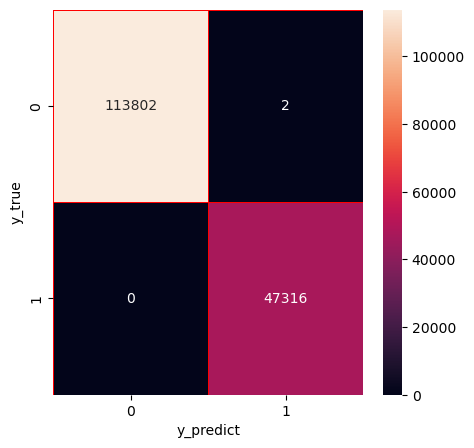

In [37]:
cn = confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cn,annot=True, linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.show()

# Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8],
}

In [40]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Access Best Parameters and Model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Use the best_model for predictions and evaluation on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Optimized Hyperparameters:", accuracy)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Accuracy with Optimized Hyperparameters: 0.9999875868917577


# Random Search

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
from scipy.stats import randint,uniform
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 10),
}


In [44]:
# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   scoring='accuracy', n_iter=100)
random_search.fit(X_train, y_train)

# Access Best Parameters and Model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Use the best_model for predictions and evaluation on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Optimized Hyperparameters:", accuracy)

Best Hyperparameters: {'learning_rate': 0.12191082165876253, 'max_depth': 7, 'n_estimators': 69}
Accuracy with Optimized Hyperparameters: 0.9999875868917577


In [45]:
print((best_model))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.12191082165876253,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=69, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
